# <font color='#00878A'>Ciência dos Dados</font>
## Projeto 3
Amanda Carmo    | 
Lucio Hallage    |
Nicole Costa    |
Vitor Miada

In [1]:
import sklearn 

In [2]:
sklearn.__version__

'0.20.1'

# <font color='#00878A'>Objetivo do projeto:</font>
<p>
Conduzir análise de dados utilizando técnicas como: regressão linear, decision tree e random forest regression.
<p>
Em nosso projeto iremos analizar a base de dados do jogo League of Legends da Riot Games, explicado mais a seguir, para fazer a previsão de vitórias de uma partida considerando-se os times e seus respectivos jogadores, além dos champions usados, que também serão definidos a seguir.



- ## O que é League of Legends: ##

League of Legends é um jogo online MOBA (Multiplayer Online Battle Arena) competitivo, no qual dez jogadores, divididos em dois times,  batalham com diferentes personagens que exercem inúmeras funções durante a partida. O jogo, que permanece em constante atualização, oferece competitividade e entretenimento para todos os jogadores de diferentes níveis de habilidade, havendo servidores que cobrem praticamente todas as regiões do mundo, havendo, pois, competições  internacionais anuais. O jogo, também conhecido como LOL é um dos digital games mais jogados no planeta.


- ## O funcionamento do jogo :


No League of Legends, o objetivo do jogo é destruir o néxus (o núcleo) da base inimiga. Para isso, serão 10 jogadores divididos em 2 times, o azul e o vermelho, que se enfrentarão num campo de batalha. Para cada jogador, existe uma função principal, na qual pode ser dividida em 5 funções: o Topo (Top-lane), o Caçador (Jungler), o Meio (Mid-lane), o Atirador (ADC) e o Suporte (SUP). Para saber qual posição cada competidor exercerá, serão escolhidos dentre dos 150 campeões (personagens), apenas 5 para cada time, no qual cada jogador selecionará um para jogar. Cada personagem escolhido, tem seu estilo, e portanto sua função dentre as 5 antes mencionadas.


- ## Data-Set ##

O dataset é constituido de apenas partidas profissionais entre 2015 a 2018 de todos os servidores. O documento, mostra principalmente, quais campeões cada time selecionou, por exemplo, o "redTopChamp", significa qual campeão o jogador do time vermelho jogou; quais foram os jogadores que jogaram a partida, por exemplo, o "blueJungle", que significa quem jogou como Caçador no time azul; qual time jogou e se ele venceu (1) ou perdeu (0), por exemplo "blueTeamTag", representa a sigla do time azul, e "bResult" igual a 0, significa que ele perdeu. Outros dados como ano, liga, não são relevantes, pois como o objetivo do projeto é estimar quem vai ganhar, quando ocorreu e onde ocorreu não são necessários.

## Preparando o ambiente no jupyter:

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib 
from sklearn.metrics import accuracy_score

Lendo a base de dados:

In [4]:
dados = pd.read_excel('matchinfo-treinamento.xlsx')
dados_testes = pd.read_excel('matchinfo-testes.xlsx')

In [5]:
dados.head(4)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2016,Spring,Season,TSM,0,1,REN,30,Hauntzer,...,Graves,Crumbz,Gragas,Ninja,Lissandra,Freeze,Caitlyn,Hakuho,Bard,http://matchhistory.na.leagueoflegends.com/en/...
1,TCL,2015,Spring,Season,BJK,1,0,NR1,43,Thaldrin,...,Maokai,Decagon Moon,RekSai,LEYL U NEHAR,Ahri,Revanche,Sivir,Swanepoel,Janna,http://matchhistory.tr.leagueoflegends.com/tr/...
2,NALCS,2017,Spring,Season,NV,1,0,C9,38,Seraph,...,Nautilus,Contractz,LeeSin,Jensen,Cassiopeia,Sneaky,Ezreal,Smoothie,Malzahar,http://matchhistory.na.leagueoflegends.com/en/...
3,IEM,2016,Spring,International,OG,0,1,TSM,33,Soaz,...,Fiora,Svenskeren,LeeSin,Bjergsen,TwistedFate,Doublelift,Ezreal,Yellowstar,Alistar,http://matchhistory.euw.leagueoflegends.com/en...


# <font color='#00878A'>Análise Explorartória</font>

## <font color='#00878A'> Classificador - random forest</font>

- ####  Primeira iteração: dados concatenados

Nesta primeira iteração, o grupo juntou os dados dos adversários em um mesmo jogo, tais como os cinco champions e os nomes dos jogadores dos times e aa duas equipes adversárias, agrupando - os em uma coluna em comum, como mostrado no novo dataframe obtiddo e plotado abaixo.

In [6]:
dados_testes.dropna(inplace=True)
columnsb=['bResult', 'blueTeamTag', 'blueTop', 'blueTopChamp', 'blueJungle','blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC','blueADCChamp', 'blueSupport', 'blueSupportChamp']
columnsr=['rResult', 'redTeamTag', 'redTop','redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle','redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport','redSupportChamp']
columns=['Result', 'TeamTag', 'Top','TopChamp', 'Jungle', 'JungleChamp', 'Middle','MiddleChamp', 'ADC', 'ADCChamp', 'Support','SupportChamp']


In [7]:
dados_b = dados[columnsb]
dados_b.columns = columns
dados_r = dados[columnsr]
dados_r.columns = columns

In [8]:
dados_concat = pd.concat([dados_b, dados_r]).dropna()
dados_concat.head(4)

,Result,TeamTag,Top,TopChamp,Jungle,JungleChamp,Middle,MiddleChamp,ADC,ADCChamp,Support,SupportChamp
0,0,TSM,Hauntzer,Trundle,Svenskeren,Elise,Bjergsen,Lulu,Doublelift,Jhin,Yellowstar,Braum
1,1,BJK,Thaldrin,Gnar,Theokoles,JarvanIV,Energy,Xerath,Nardeus,Graves,Dumbledoge,Annie
2,1,NV,Seraph,Maokai,LirA,Nidalee,Ninja,Jayce,Apollo,Ziggs,Hakuho,Lulu
3,0,OG,Soaz,Trundle,Amazing,Elise,PowerOfEvil,Talon,Zven,Lucian,Mithy,Braum


In [9]:
dados_bt = dados_testes[columnsb]
dados_bt.columns = columns
dados_rt = dados_testes[columnsr]
dados_rt.columns = columns

In [10]:
teste_concat = pd.concat([dados_bt, dados_rt]).dropna()
teste_concat.head(4)

,Result,TeamTag,Top,TopChamp,Jungle,JungleChamp,Middle,MiddleChamp,ADC,ADCChamp,Support,SupportChamp
0,1,GCU,Solo,Shen,Santorin,JarvanIV,Fly,Orianna,Rikara,Sivir,Whyin,Thresh
1,1,CNB,Lep,Maokai,Minerva,Graves,Tinowns,Syndra,pbO,Jhin,Woswos,Malzahar
2,0,MSE,Ninuo,Maokai,Wulala,Gragas,M1ssion,Vladimir,CorGi,Sivir,Kaiwing,Braum
3,1,PDS,jer0m,Gnar,RafaL0L,Gragas,Icytower,Vladimir,xpng,Varus,Choisix,Thresh


In [11]:
y_train = dados_concat['Result']
x_train = dados_concat.drop(columns='Result')

In [12]:
y_test = teste_concat['Result']
x_test = teste_concat.drop(columns='Result')

Convertendo as variáveis categóricas em qualitativas

In [13]:
# utilizamos o OneHotEncoder para fazer essa conversão
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

Implementando o Modelo

In [14]:
model = RandomForestClassifier(random_state = 0)
model.fit(x_train_encoded, y_train)

C:\Users\insper\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [15]:
model.score(x_train_encoded, y_train)

0.9798190675017397

Agora vamos testar a acurácia do modelo:

In [16]:
x_test_encoded = encoder.transform(x_test)

In [17]:
# Testa modelo
y_predict = model.predict(x_test_encoded)

In [18]:
# Cálcula acurácia
acc = accuracy_score(y_test, y_predict)
print("Acurácia: {0}".format(acc))

Acurácia: 0.5698924731182796


### Considerando os dois times, separadamente em uma partida

- #### Segunda iteração: dados não concatenados

Separando Treinamento e Teste

In [19]:
y_train = dados['bResult']
x_train = dados.drop(columns=['bResult', 'rResult'])
y_test = dados_testes['bResult']
x_test = dados_testes.drop(columns=['bResult', 'rResult'])

Convertendo as variáveis categóricas em quantitativas

In [20]:
# utilizamos o OneHotEncoder para fazer essa conversão
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

Implementando o modelo

In [21]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(x_train_encoded, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Agora vamos testar a acurácia do modelo:

In [22]:
x_test_encoded = encoder.transform(x_test.astype(str).values)

In [23]:
# Testa modelo
y_predict2 = model.predict(x_test_encoded)

In [24]:
model.score(x_test_encoded, y_test)

0.6514336917562724

### Dados concatenados X dados não concatenados
##### Porque a análise com os dados não concatenados funcionou melhor que os dados não concatenados?

Como observado pelos resultados dos três classificadores acima, fica claro que a análise com os dados não concatenados possui uma acurácia maior do que a acurácia dos dados concatenados.

Isso ocorre, pois os dads não concatenados consideram os adversários, havendo as respectivas informações de cada time, ou seja,  de cada um dos lados, determinantes na acurácia, haja vista a interferência do time adversário e sua probabilidade de vitória, importantes para classificar o resultado do jogo. Portanto, comparar as probabilidades de vitória respectivas dos times azul e vermelho em uma partida torna-se fundamental para obter melhoria nos classificadores utilizados.

___

### Análise da probabilidade de acerto do classificador, segundo a segunda iteração

A seguir, o grupo criou um dataset contendo as probabilidades de vitórias que o classificador obteve do time azul. Assim, se a probabilidade de vitória for abaixo de 50%, o classificador dirá que o time perdeu e, se for maior que 50%, dirá que venceu. 

In [25]:
dados_testes['bPredict'] = y_predict2

In [26]:
y_predict_proba = model.predict_proba(x_test_encoded)

In [27]:
y_predict_proba

array([[0.53, 0.47],
       [0.34, 0.66],
       [0.6 , 0.4 ],
       ...,
       [0.44, 0.56],
       [0.58, 0.42],
       [0.4 , 0.6 ]])

In [28]:
dados_testes['bPredictProba'] = y_predict_proba[:,1]

In [29]:
dados_testes.sort_values(by='bPredictProba')[['blueTeamTag', 'redTeamTag', 'bPredictProba', 'bResult']].head(20)

,blueTeamTag,redTeamTag,bPredictProba,bResult
869,CJ,ROX,0.07,0
941,GG,LYN,0.10,0
548,MM,S04,0.10,1
726,FB,FW,0.10,0
400,JTH,LYN,0.10,0
828,REN,IMT,0.11,0
886,P1,IMT,0.11,1
221,NRG,IMT,0.11,1
631,GG,LYN,0.12,0
16,HKE,FW,0.13,0


In [30]:
comp_erros = dados_testes[dados_testes['bResult'] != dados_testes["bPredict"]]
comp_acertos = dados_testes[dados_testes['bResult'] == dados_testes["bPredict"]]

In [31]:
comp_acertos['bPredictProba'].value_counts().head(10)

0.71    22
0.68    21
0.74    19
0.66    19
0.65    18
0.59    17
0.72    17
0.54    17
0.40    16
0.80    15
Name: bPredictProba, dtype: int64

In [32]:
comp_erros['blueTeamTag'].value_counts().head(10)

CLG    11
AFs    10
C9     10
JAG     9
SKT     9
G2      9
LZ      8
H2K     8
FW      8
SSG     8
Name: blueTeamTag, dtype: int64

#### Grau de incerteza x Acurácia

A seguir, é plotado o gráfico do grau de incerteza (representado pela probabilidade de acerto) pela acurácia, cujo objetivo pauta-se em ajudar na decisão de pessoas, por exemplo, que desejam apostar em um determinado time (no caso, azul) em um determinado jogo. 
<p>
Como visto no classificador random forest na segunda iteração do grupo, a acurácia é de aproximadamente 65%. Neste comtexto, imagina-se, hipoteticamemte, uma pessoa que deseja apostar se o time azul vai ganhar ou perder. Para aumentar as probabilidades de tal pessoa acertar, assim, ela olhará a tabela contendo a probabilidade de vitória do time. Assim, por critério da pessoa, esta escolherá um determinado alpha: se a probabilidade de vitória do time estiver, por exemplo, entre 0 e 30%, pode-se apostar com maior segurança que o time perderá. Se estiver entre 70% e 100%, pode-se dizer com maior certeza que ganhará. Neste exemplo, o alpha escolhido é de 30%, mas ele pode ficar por critério da pessoa que estiver apostando.


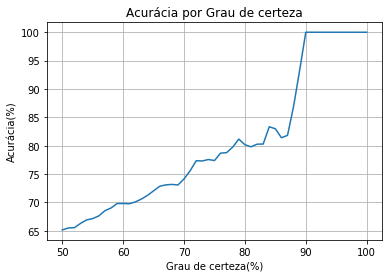

In [33]:
import matplotlib.pyplot as plt
a=0
alfa=[]
alf=[]
acc=[]
while a<=50:
    alfa.append(a)
    a+=1
for a in alfa:    
    alf.append(a/100)
for a in alf:
    acertos=len(comp_acertos[comp_acertos.bPredictProba<a])+len(comp_acertos[comp_acertos.bPredictProba>=1-a])
    total=len(dados_testes[dados_testes.bPredictProba<a])+len(dados_testes[dados_testes.bPredictProba>=1-a])
    if total==0:
        total=1
    if acertos==0:
        acertos=1
    acc.append(acertos*100/total)
plt.plot(100 - np.array(alfa),acc)
plt.ylabel('Acurácia(%)')
plt.xlabel('Grau de certeza(%)')
plt.title('Acurácia por Grau de certeza')
plt.grid()
plt.show()

___

## <font color='#00878A'>Logistic regression</font>

In [34]:
y_train2 = dados['bResult']
x_train2 = dados.drop(columns = ['bResult', 'rResult'])

In [35]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train2_encoded = encoder.fit_transform(x_train2.astype(str).values)

In [36]:
model2 = LogisticRegression(solver='lbfgs', multi_class='auto')

In [37]:
model2.fit(x_train2_encoded, y_train2)

C:\Users\insper\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
model2.score(x_train2_encoded,y_train2)

0.9067548853669796

#### <font color='#00878A'>Testes</font>

In [39]:
dados_testes = pd.read_excel('matchinfo-testes.xlsx')
dados_testes.dropna(inplace=True)

In [40]:
y_test2 = dados_testes['bResult']
x_test2 = dados_testes.drop(columns=['bResult','rResult'])

In [41]:
x_test2_encoded = encoder.transform(x_test2.astype(str).values)

In [42]:
y_pred2 = model2.predict(x_test2_encoded)

In [43]:
acc_LogisticRegression = accuracy_score(y_test2, y_pred2)

In [44]:
y_pred2

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [45]:
acc_LogisticRegression

0.649641577060932

In [46]:
dados_testes['bPredict'] = y_pred2

In [47]:
y_predict_proba2 = model2.predict_proba(x_test2_encoded)

In [48]:
y_predict_proba2

array([[0.93836003, 0.06163997],
       [0.25914059, 0.74085941],
       [0.71049151, 0.28950849],
       ...,
       [0.3492061 , 0.6507939 ],
       [0.87564953, 0.12435047],
       [0.58152733, 0.41847267]])

In [49]:
dados_testes['bPredictProba'] = y_predict_proba2[:,1]

In [50]:
dados_testes.sort_values(by='bPredictProba')[['blueTeamTag', 'redTeamTag', 'bPredictProba', 'bResult']].head(20)

,blueTeamTag,redTeamTag,bPredictProba,bResult
726,FB,FW,0.002149,0
85,DoR,HKES,0.006325,0
510,AS,ahq,0.009038,0
1016,TM,DW,0.009504,0
473,SZ,USG,0.010163,0
47,SSG,KOO,0.012686,0
430,XG,FW,0.014136,0
886,P1,IMT,0.015452,1
249,NME,TSM,0.016629,0
572,CNB,KST,0.018319,0


In [51]:
comp_erros = dados_testes[dados_testes['bResult'] != dados_testes["bPredict"]]
comp_acertos = dados_testes[dados_testes['bResult'] == dados_testes["bPredict"]]

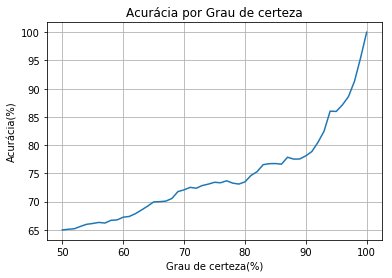

In [52]:
import matplotlib.pyplot as plt
a=0
alfa=[]
alf=[]
acc=[]
while a<=50:
    alfa.append(a)
    a+=1
for a in alfa:    
    alf.append(a/100)
for a in alf:
    acertos=len(comp_acertos[comp_acertos.bPredictProba<a])+len(comp_acertos[comp_acertos.bPredictProba>=1-a])
    total=len(dados_testes[dados_testes.bPredictProba<a])+len(dados_testes[dados_testes.bPredictProba>=1-a])
    if total==0:
        total=1
    if acertos==0:
        acertos=1
    acc.append(acertos*100/total)
plt.plot(100 - np.array(alfa),acc)
plt.ylabel('Acurácia(%)')
plt.xlabel('Grau de certeza(%)')
plt.title('Acurácia por Grau de certeza')
plt.grid()
plt.show()


___

# <font color='#00878A'>Decision tree</font>

Vamos implementar agora uma técnica chamada Decision Tree. Ela é utilizada para classificadores e regressões, no nosso caso classificação. O objetivo do uso da Decision Tree é criar um modelo que fará uma predição baseado em uma classifição de várias classes.

### Separando treinamento e teste

Com a leitura da base de dados na célula acima, já podemos começar a construir o classificador Decision Tree e treiná-lo com o conjunto de treinamento.

In [75]:
dados_testes = pd.read_excel('matchinfo-testes.xlsx')
dados_testes.dropna(inplace=True)
y_train = dados['bResult']
x_train = dados.drop(columns=['bResult', 'rResult'])
y_test = dados_testes['bResult']
x_test = dados_testes.drop(columns=['bResult', 'rResult'])

- #### Convertendo as variáveis categóricas em quantitativas

In [76]:
# fizemos essa conversão utilizando o OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

- #### Implementando o modelo

In [77]:
#implementando a técnica decision tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train_encoded, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [78]:
x_test_encoded3 = encoder.transform(x_test.astype(str).values)

### Agora vamos testar a acurácia do modelo:

In [79]:
# Testa modelo
y_pred = regressor.predict(x_test_encoded3)

# Cálcula acurácia
acc = accuracy_score(y_test, y_pred)

print("Acurácia: {}".format(acc))

Acurácia: 0.5824372759856631


Agora que nosso modelo está treinado, podemos plottar a "árvore de decisões":

In [ ]:
A acuracia do decision tree foi bem abaixo dos outros classificadores, isso se deve pelo decision tree  

### Separando treinamento e teste


Com a leitura da base de dados na célula acima, já podemos começar a construir o classificador Decision Tree e treiná-lo com o conjunto de treinamento.

### Convertendo as variáveis categóricas em quantitativas

### Implementando o modelo

___

## <font color='#00878A'>Lucião Bayes</font>

Este classificador foi criado pelo grupo, cujo objetivo foi obter os resultados probabilísticos e compará-los aos obtidos com os classificadores passados em aula pelo professor.
<p>
A priori, foram definidos dados nos quais o classificador iria basear-se, sendo eles: win rate de cada jogador, win rate de cada Champion e, por fim, o win rate de cada time. Para calculá-los, foi usada a planilha contendo os resultados e os dados de cada partida. Desta forma, foram calculadas as probabilidades de cada time para ganhar o jogo, as quais foram comparadas. O time que tivesse, pois, maior probabilidade de vitória seria o vencedor.

In [ ]:
team={}
for i in dados.blueTeamTag:
    team[i]=0
for i in dados.redTeamTag:
    team[i]=0
for k,v in team.items():
    wins=len(dados[(dados.blueTeamTag==k) & (dados.bResult==1)])+len(dados[(dados.redTeamTag==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueTeamTag==k])+ len(dados[dados.redTeamTag==k])
    if matchs!=0:
        team[k]=wins/matchs


In [ ]:
top = {}
for i in dados.blueTopChamp:
    top[i]=0
for i in dados.redTopChamp:
    top[i]=0
for k,v in  top.items():
    wins=len(dados[(dados.blueTopChamp==k) & (dados.bResult==1)])+len(dados[(dados.redTopChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueTopChamp==k])+ len(dados[dados.redTopChamp==k])      
    if matchs!=0:
        top[k]=wins/matchs


In [ ]:
jg = {}
for i in dados.blueJungleChamp:
    jg[i]=0
for i in dados.redJungleChamp:
    jg[i]=0
for k,v in  jg.items():
    wins=len(dados[(dados.blueJungleChamp==k) & (dados.bResult==1)])+len(dados[(dados.redJungleChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueJungleChamp==k])+ len(dados[dados.redJungleChamp==k])      
    if matchs!=0:
        jg[k]=wins/matchs


In [ ]:
mid = {}
for i in dados.blueMiddleChamp:
    mid[i]=0
for i in dados.redMiddleChamp:
    mid[i]=0
for k,v in  mid.items():
    wins=len(dados[(dados.blueMiddleChamp==k) & (dados.bResult==1)])+len(dados[(dados.redMiddleChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueMiddleChamp==k])+ len(dados[dados.redMiddleChamp==k])      
    if matchs!=0:
        mid[k]=wins/matchs


In [ ]:
adc = {}
for i in dados.blueADCChamp:
    adc[i]=0
for i in dados.redADCChamp:
    adc[i]=0
for k,v in  adc.items():
    wins=len(dados[(dados.blueADCChamp==k) & (dados.bResult==1)])+len(dados[(dados.redADCChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueADCChamp==k])+ len(dados[dados.redADCChamp==k])      
    if matchs!=0:
        adc[k]=wins/matchs


In [ ]:
sup = {}
for i in dados.blueSupportChamp:
    sup[i]=0
for i in dados.redSupportChamp:
    sup[i]=0
for k,v in  sup.items():
    wins=len(dados[(dados.blueSupportChamp==k) & (dados.bResult==1)])+len(dados[(dados.redSupportChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueSupportChamp==k])+ len(dados[dados.redSupportChamp==k])      
    if matchs!=0:
        sup[k]=wins/matchs


In [ ]:
top_player = {}
for i in dados.blueTop:
    top_player[i]=0
for i in dados.redTop:
    top_player[i]=0
for k,v in  top_player.items():
    wins=len(dados[(dados.blueTop==k) & (dados.bResult==1)])+len(dados[(dados.redTop==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueTop==k])+ len(dados[dados.redTop==k])      
    if matchs!=0:
        top_player[k]=wins/matchs


In [ ]:
jg_player = {}
for i in dados.blueJungle:
    jg_player[i]=0
for i in dados.redJungle:
    jg_player[i]=0
for k,v in  jg_player.items():
    wins=len(dados[(dados.blueJungle==k) & (dados.bResult==1)])+len(dados[(dados.redJungle==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueJungle==k])+ len(dados[dados.redJungle==k])      
    if matchs!=0:
        jg_player[k]=wins/matchs


In [ ]:
mid_player = {}
for i in dados.blueMiddle:
    mid_player[i]=0
for i in dados.redMiddle:
    mid_player[i]=0
for k,v in  mid_player.items():
    wins=len(dados[(dados.blueMiddle==k) & (dados.bResult==1)])+len(dados[(dados.redMiddle==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueMiddle==k])+ len(dados[dados.redMiddle==k])      
    if matchs!=0:
        mid_player[k]=wins/matchs


In [ ]:
adc_player = {}
for i in dados.blueADC:
    adc_player[i]=0
for i in dados.redADC:
    adc_player[i]=0
for k,v in  adc_player.items():
    wins=len(dados[(dados.blueADC==k) & (dados.bResult==1)])+len(dados[(dados.redADC==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueADC==k])+ len(dados[dados.redADC==k])      
    if matchs!=0:
        adc_player[k]=wins/matchs


In [ ]:
sup_player = {}
for i in dados.blueSupport:
    sup_player[i]=0
for i in dados.redSupport:
    sup_player[i]=0
for k,v in  sup_player.items():
    wins=len(dados[(dados.blueSupport==k) & (dados.bResult==1)])+len(dados[(dados.redSupport==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueSupport==k])+ len(dados[dados.redSupport==k])      
    if matchs!=0:
        sup_player[k]=wins/matchs


Naive baiyes



In [ ]:
#dicionarios juntos
alls={}

for k,v in team.items():
    alls[k]=v

for k,v in top.items():
    alls[k]=v

for k,v in mid.items():
    if k not in mid.keys():
        alls[k]=v
    else:
        alls[k]=(v+mid[k])/2

for k,v in jg.items():
    if k not in jg.keys():
        alls[k]=v
    else:
        alls[k]=(v+jg[k])/2

for k,v in adc.items():
    if k not in adc.keys():
        alls[k]=v
    else:
        alls[k]=(v+adc[k])/2

for k,v in sup.items():
    if k not in sup.keys():
        alls[k]=v
    else:
        alls[k]=(v+sup[k])/2

for k,v in top_player.items():
    if k not in top_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+top_player[k])/2

for k,v in jg_player.items():
    if k not in jg_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+jg_player[k])/2

for k,v in mid_player.items():
    if k not in mid_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+mid_player[k])/2

for k,v in adc_player.items():
    if k not in adc_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+adc_player[k])/2

for k,v in sup_player.items():
    if k not in sup_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+sup_player[k])/2
    

In [ ]:
dados_testes = pd.read_excel('matchinfo-testes.xlsx')

In [ ]:
wins=[]
for i in range(len(dados_testes)):
    probblue=1
    probred=1
    
    for f in columnsb:
        if dados_testes.loc[i,f] not in alls.keys():
            probblue*=0.5
        else:
            if alls[dados_testes.loc[i,f]]==0 or alls[dados_testes.loc[i,f]]==1:
                probblue*=0.5
            else:
                probblue*=alls[dados_testes.loc[i,f]]
    for f in columnsr:
        if dados_testes.loc[i,f] not in alls.keys():
            probred*=0.5
        else:
            if alls[dados_testes.loc[i,f]]==0 or alls[dados_testes.loc[i,f]]==1:
                probred*=0.5
            else:
                probred*=alls[dados_testes.loc[i,f]]
    if probblue<probred:
        wins.append(0)
    else:
        wins.append(1)

In [ ]:
#teste de qualidade
certo=0
total=0
for i in range(len(dados_testes)):
    if dados_testes.loc[i,'bResult']==wins[i]:
        certo+=1
        total+=1
    else:
        total+=1
print(100*certo/total,'%')
        

In [ ]:
print("Acurácia: {}".format(certo/total))

In [ ]:
dados_testes.columns

In [ ]:
clas=['blueTeamTag',
       'redTeamTag', 'blueTop', 'blueTopChamp', 'blueJungle',
       'blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC',
       'blueADCChamp', 'blueSupport', 'blueSupportChamp', 'redTop',
       'redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle',
       'redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport',
       'redSupportChamp']
print('Se voce quiser pode tentar classificar os seus dados')
data=[]
for i in clas:
    a=input('{0} ? '.format(i))
    data.append(a)

    

## Conclusão

Ao se comparar as diversas técnicas de classificação, chegamos à conclusão de que o classificador _Random Forrest_ é o que retornou a maior acurácia. Isso se dá porque ...

## <font color=red>COMPLETAR AQUI EM CIMA